In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from tqdm import tqdm
#josue

In [2]:
# Load the CSV file
df = pd.read_csv('x-ray_data.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
3,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,0.168
4,00000003_006.png,Hernia,5,3,79,F,PA,2992,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
44102,00030801_000.png,No Finding,0,30801,38,M,PA,2500,2048,0.168,0.168
44103,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
44104,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
44105,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [3]:
print(df['Finding Labels'].value_counts())

No Finding                                                            28767
Infiltration                                                           3596
Atelectasis                                                            1453
Nodule                                                                 1188
Effusion                                                                846
                                                                      ...  
Cardiomegaly|Effusion|Fibrosis|Pleural_Thickening|Pneumothorax            1
Cardiomegaly|Effusion|Fibrosis|Infiltration                               1
Pneumonia|Pneumothorax                                                    1
Cardiomegaly|Fibrosis|Nodule                                              1
Atelectasis|Emphysema|Infiltration|Pleural_Thickening|Pneumothorax        1
Name: Finding Labels, Length: 464, dtype: int64


In [4]:
# Define the width and height for resizing 
width = 128  
height = 128

In [5]:
# Define paths to your image folder and CSV file
image_dir = "Images/x_ray_images"

In [6]:
total_records = len(df)
half_records = total_records // 2  # Calculate half of the records

In [7]:
# Variables to control start and end indices
start_index = 0
end_index = half_records

start_index, end_index

(0, 22053)

In [8]:
def load_images_and_labels(df, x_label, y_label, image_dir, start_index, end_index, width, height):
    images = []
    labels = []
    total_records = end_index - start_index
    
    for index, row in tqdm(df.iloc[start_index:end_index].iterrows(), total=total_records):
        image_filename = row[x_label]

        # Construct the full image path
        image_path = os.path.join(image_dir, image_filename)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        if image is not None:
            # Perform any necessary preprocessing on the image here
            image = cv2.resize(image, (width, height))
            image = image / 255.0  # Normalization

            # Add the image to the list
            images.append(image)

            # Add the label
            label = row[y_label]
            labels.append(label)
    
    return images, labels

In [9]:
def plot_image(image, label):
    
    # Show image    
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

In [13]:
# This is the method that meets our needs to preserve the format of the images
def save_npz_file(images, labels, file_name):
    np.savez_compressed(f'{file_name}.npz', images=images, labels=labels)
            
    print("file saved successfully!")

In [27]:
def load_npz_file_lazy(file_name):
    # Load the .npz file in "lazy loading" mode
    loaded_data = np.load(file_name + '.npz', mmap_mode='r')

    # Get images and labels without fully loading them into memory
    images = loaded_data['images']
    labels = loaded_data['labels']

    return images, labels

In [10]:
# colum names into the df
x_label = "Image Index"
y_label = "Finding Labels"

In [11]:
# Iterate through the CSV and load images
# First part
images, labels = load_images_and_labels(df, x_label, y_label, image_dir, start_index, end_index, width, height)

100%|████████████████████████████████████████████████████████████████████████████| 22053/22053 [08:02<00:00, 45.68it/s]


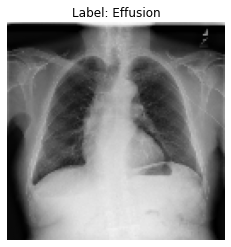

In [16]:
# Show a specific image
index = 55  # Change the value of 'index' to show different images
plot_image(images[index], labels[index])

In [22]:
# Save first part of the data
save_npz_file(images, labels, 'data_npz_part1')

file saved successfully!


In [14]:
# Update indices for the second half of the DataFrame
start_index = half_records
end_index = total_records

start_index, end_index

(22053, 44107)

In [15]:
# Iterate through the CSV and load images
# Second part
images2, labels2 = load_images_and_labels(df, x_label, y_label, image_dir, start_index, end_index, width, height)

100%|████████████████████████████████████████████████████████████████████████████| 22054/22054 [08:37<00:00, 42.62it/s]


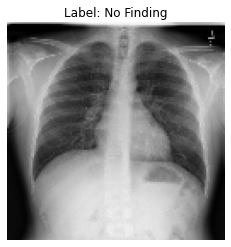

In [23]:
# Show a specific image
index = 55  # Change the value of 'index' to show different images
plot_image(images2[index], labels2[index])

In [24]:
# Unir las listas de imágenes
images.extend(images2)

In [25]:
# Unir las listas de etiquetas
labels.extend(labels2)

In [26]:
# Save second part of the data
save_npz_file(images, labels, 'mega_data_npz')

file saved successfully!


In [28]:
X, y = load_npz_file_lazy('mega_data_npz')

In [29]:
X.shape

(44107, 128, 128, 3)

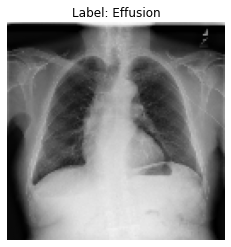

In [31]:
# Show a specific image
index = 55  # Change the value of 'index' to show different images
plot_image(X[index], y[index])